In [20]:
import numpy as num
import matplotlib.pyplot as plot
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [21]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
class_names = iris.target_names

In [76]:
len(y)

150

In [75]:
len(x)

150

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [58]:
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(x_train, y_train).predict(x_test)

Normalized confusion matrix
[[1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.    1.   ]]


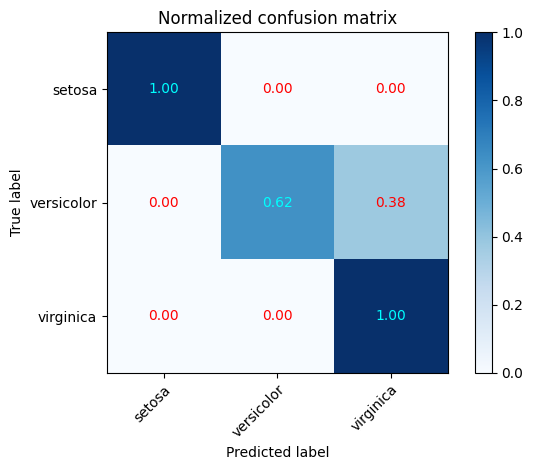

In [54]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plot.cm.Blues):
   
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        
    cm = confusion_matrix(y_true, y_pred)

    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    
    print(cm)


    
    figure, axis = plot.subplots()
    im = axis.imshow(cm, interpolation='nearest', cmap=cmap)
    axis.figure.colorbar(im, ax=axis)

    axis.set(xticks=num.arange(cm.shape[1]),
           yticks=num.arange(cm.shape[0]),

           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    plot.setp(axis.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axis.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="cyan" if cm[i, j] > thresh else "red")
    figure.tight_layout()
    return axis

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plot.show()

<hr />

### Accuracy Score

**Interpreting Accuracy**
* The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

In [61]:
from sklearn.metrics import accuracy_score
y_true = y_test
print("accuracy score:", round(accuracy_score(y_true, y_pred),2))
print("accuracy score:", accuracy_score(y_true, y_pred, normalize=False))
print("number of predictions is:", len(y_pred))

accuracy score: 0.84
accuracy score: 32
number of predictions is: 38


<hr />

### Precision Score

**Interpreting Precision**
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

In [50]:
from sklearn.metrics import precision_score
print("precision score:", round(precision_score(y_true, y_pred, average='weighted'),2))

precision score: 0.91


<hr />

### Recall 

**Interpreting Recall**
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
* The best value is 1 and the worst value is 0.

In [69]:
from sklearn.metrics import recall_score
print("recall:", round(recall_score(y_true, y_pred, average='weighted'),2))

recall: 0.84


<hr />

### F1 Score 

**Interpretting F1 Score**
* The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 
* The relative contribution of precision and recall to the F1 score are equal. 
* The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)

In [70]:
from sklearn.metrics import f1_score
print("f1 score:", round(f1_score(y_true, y_pred, average='weighted'),2))

f1 score: 0.84
